In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error , root_mean_squared_error

In [2]:
df_cleaned = pd.read_csv("cleaned_data.csv")
df_cleaned.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Cluster
0,6,148,72,35,0,33.6,0.627,50,1,0
1,1,85,66,29,0,26.6,0.351,31,0,1
2,8,183,64,0,0,23.3,0.672,32,1,0
3,1,89,66,23,94,28.1,0.167,21,0,1
4,5,116,74,0,0,25.6,0.201,30,0,1


In [3]:
X = df_cleaned.drop('DiabetesPedigreeFunction', axis=1) 
y = df_cleaned['DiabetesPedigreeFunction']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# - Linear Regression

In [5]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

linear_pred = linear_model.predict(X_test)
linear_pred

array([0.54025805, 0.49534795, 0.40513377, 0.27149349, 0.3034312 ,
       0.49204063, 0.5082398 , 0.50294871, 0.35684096, 0.36977561,
       0.54730718, 0.36711405, 0.39840494, 0.33224607, 0.40333404,
       0.26380274, 0.32714195, 0.30627126, 0.3865376 , 0.50223608,
       0.41239345, 0.36353023, 0.48001878, 0.38007966, 0.47706549,
       0.40250968, 0.40695338, 0.43069524, 0.59971325, 0.55760265,
       0.46527835, 0.40215103, 0.43065655, 0.3606247 , 0.58196943,
       0.36202856, 0.33693969, 0.53282678, 0.53376078, 0.40414267,
       0.44323915, 0.50542164, 0.39107432, 0.47635971, 0.36625199,
       0.31718946, 0.32806272, 0.34217823, 0.43758065, 0.43395144,
       0.37676388, 0.35767784, 0.37616833, 0.37917757, 0.37992768,
       0.5487718 , 0.40728098, 0.54443476, 0.58173427, 0.41499615,
       0.30787778, 0.31249197, 0.39761856, 0.49819298, 0.49495441,
       0.38650697, 0.34125949, 0.63306202, 0.60229858, 0.60637193,
       0.42563809, 0.38565222, 0.34032391, 0.37955542, 0.39292

In [6]:
print(f"Mean Absolute Error     : { mean_absolute_error    (y_test , linear_pred ) :.5f}")
print(f"Mean Squared Error      : { mean_squared_error     (y_test , linear_pred ) :.5f}")
print(f"Root Mean Squared Error : { root_mean_squared_error(y_test , linear_pred ) :.5f}")

Mean Absolute Error     : 0.19156
Mean Squared Error      : 0.05743
Root Mean Squared Error : 0.23966


# - Ridge Regression

In [8]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

ridge_pred = ridge_model.predict(X_test)

In [9]:
print(f"Mean Absolute Error     : { mean_absolute_error     (y_test , ridge_pred ) :.5f}")
print(f"Mean Squared Error      : { mean_squared_error      (y_test , ridge_pred ) :.5f}")
print(f"Root Mean Squared Error : { root_mean_squared_error (y_test , ridge_pred ) :.5f}")

Mean Absolute Error     : 0.19158
Mean Squared Error      : 0.05744
Root Mean Squared Error : 0.23967


# - Lasso Regression

In [11]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

lasso_pred = lasso_model.predict(X_test)

In [12]:
print(f"Mean Absolute Error     : {mean_absolute_error      (y_test , lasso_pred ) :.5f}")
print(f"Mean Squared Error      : {mean_squared_error       (y_test , lasso_pred ) :.5f}")
print(f"Root Mean Squared Error : { root_mean_squared_error (y_test , lasso_pred ) :.5f}")

Mean Absolute Error     : 0.19530
Mean Squared Error      : 0.05936
Root Mean Squared Error : 0.24364


#### Lower values are better
####  So : 
####     - Best MAE  : Linear Regression
####     - Best MSE  : Linear Regression
####     - Best RMSE : Linear Regression
####  So : 
####      - Linear Regression is the best

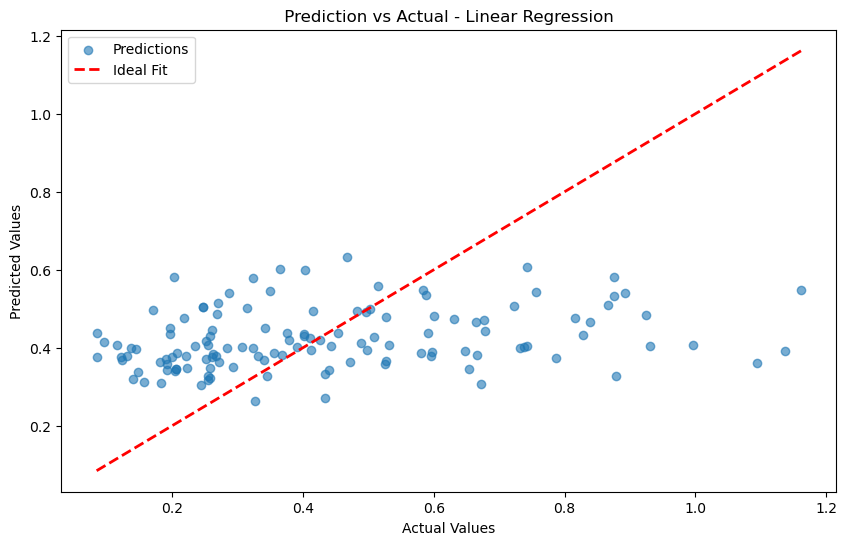

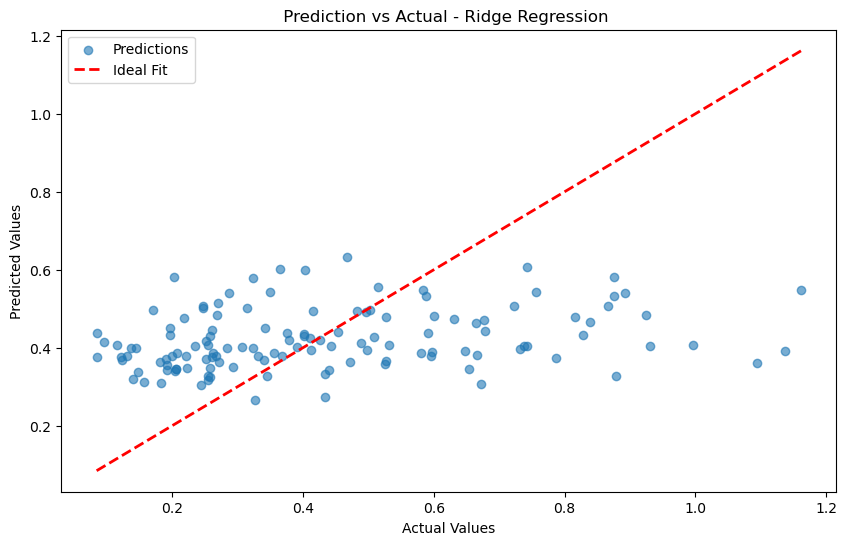

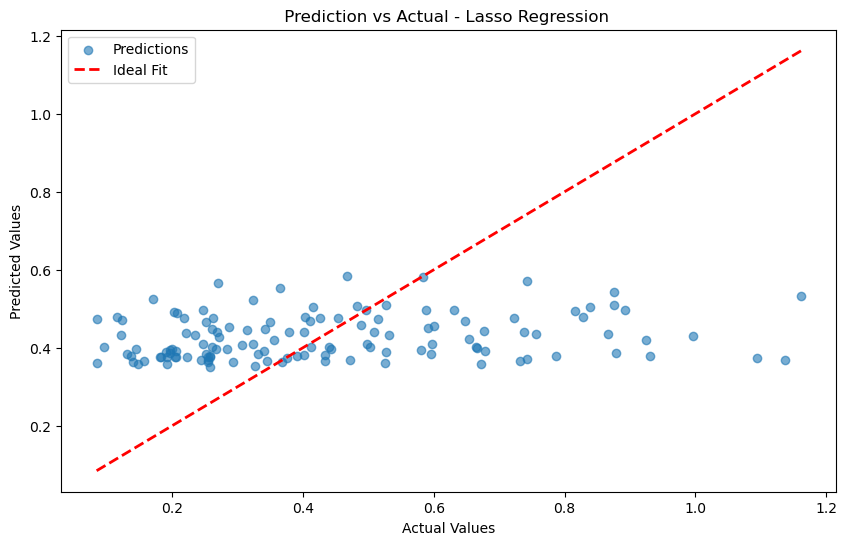

In [14]:
def plot_predictions_vs_actual(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.6, label='Predictions')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2, label='Ideal Fit')
    plt.title(title)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.show()

plot_predictions_vs_actual ( y_test , linear_model.predict(X_test) , ' Prediction vs Actual - Linear Regression ' )
plot_predictions_vs_actual ( y_test , ridge_model.predict (X_test) , ' Prediction vs Actual - Ridge Regression  ' )
plot_predictions_vs_actual ( y_test , lasso_model.predict (X_test) , ' Prediction vs Actual - Lasso Regression  ' )

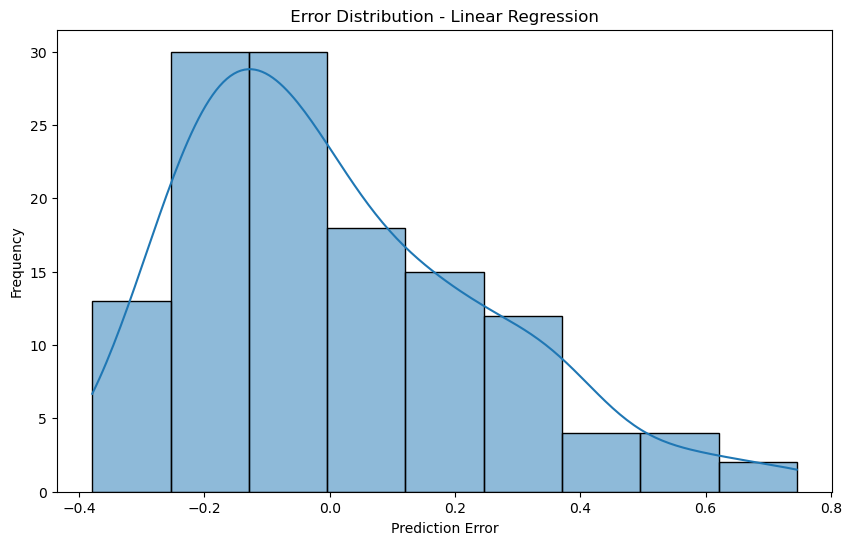

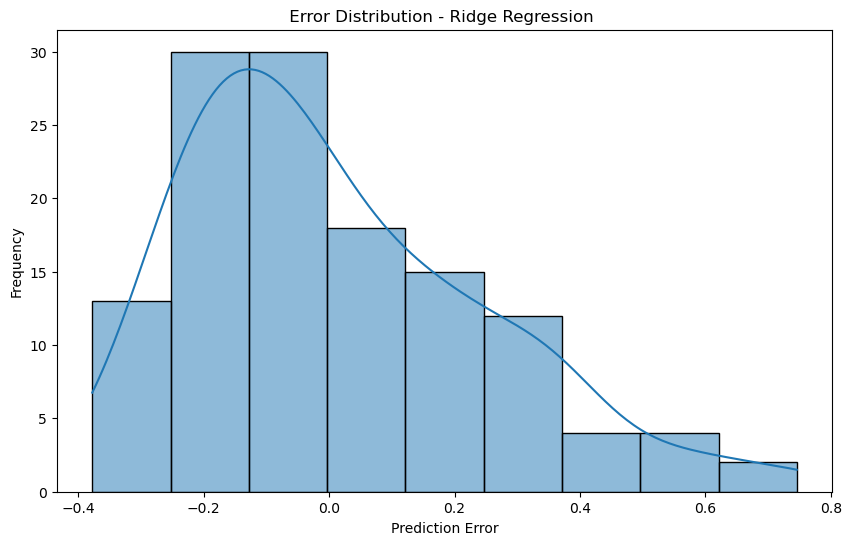

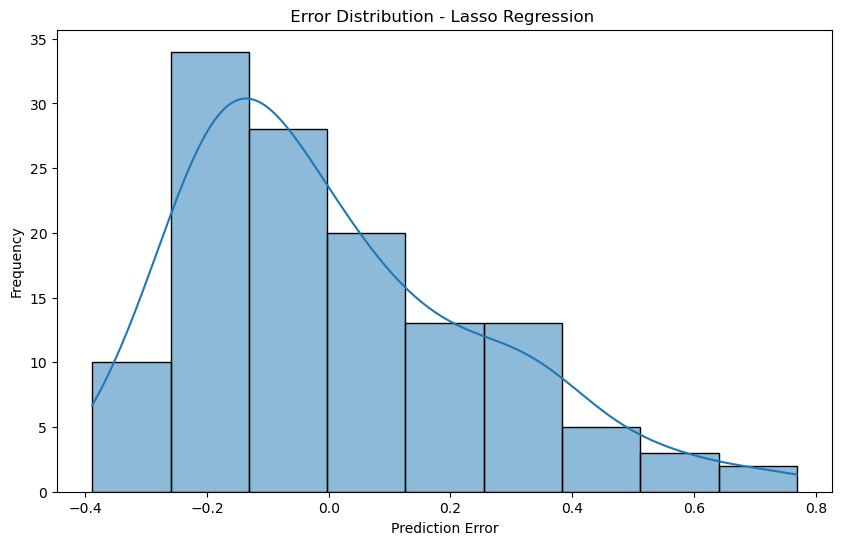

In [15]:
def plot_error_distribution(y_true, y_pred, title):
    errors = y_true - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(errors, kde=True)
    plt.title(title)
    plt.xlabel('Prediction Error')
    plt.ylabel('Frequency')
    plt.show()

plot_error_distribution( y_test , linear_model.predict(X_test) , ' Error Distribution - Linear Regression ' )
plot_error_distribution( y_test , ridge_model.predict(X_test)  , ' Error Distribution - Ridge Regression  ' )
plot_error_distribution( y_test , lasso_model.predict(X_test)  , ' Error Distribution - Lasso Regression  ' )
